# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-test-splitting" data-toc-modified-id="Train-test-splitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test splitting</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Intro

A decision tree tries to predict the target variable using a logic like the following.

<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width=600>

Decision trees:
 * are used **both** for classification (previous example Fit/Unfit) and regression
 * involve stratifying (segmenting) the predictor space...
 * in an iterative manner
 * are given this name because splitting rules can be summarized in a tree

Decision trees:
 * are simple
 * are useful for interpretation
 * are not very powerful predictors but...
 * give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms

## The problem

Today we will be using a **white wine** dataset

Experts have rated several wines, whose physical properties are also given

In [6]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [7]:
df.shape

(4898, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


We want to:
 * build a **supervised** learning model
 * which is a **regression** model (predict quantitative feature)
 * that tries to predict wine `quality` from its physical properties (so that we do not anymore need experts' advice)

We will do train test splitting for correct asessment of model performance

We will use MSE metric: $$MSE=\frac{1}{N}\sum(\hat{y} - y)^2$$

In [ ]:
from sklearn.metrics import mean_squared_error

We will:
 * try several models and...
 * keep the one with the **least** MSE on **test set** (also called test error)
 * anyways, we will always show training error too

## Data exploration

In [ ]:
df.isna().sum().sum()

In [ ]:
df.columns

In [ ]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [ ]:
df.columns

In [ ]:
sns.countplot(x=df.quality, palette="Blues")

## Train test splitting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
target = "quality"

In [12]:
# predictors
X = df.drop(target, axis=1)
# target
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=666)

In [14]:
X.shape

(4898, 11)

In [15]:
X_train.shape

(3918, 11)

In [17]:
X_test.shape

(980, 11)

In [18]:
y_train.shape

(3918,)

In [19]:
y_test.shape

(980,)

## Models

### Baseline model

The baseline model predicts the mean quality for every wine

<AxesSubplot:xlabel='quality', ylabel='count'>

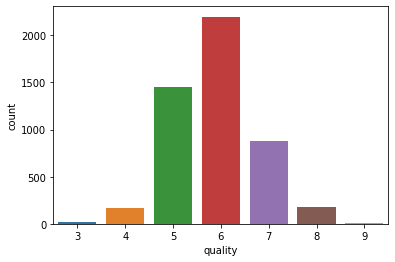

In [20]:
sns.countplot(x=df.quality)

In [21]:
baseline = y_train.mean()

In [22]:
baseline

5.8894844308320575

MSE can be manually computed

Train error

In [23]:
((y_train - baseline) ** 2).mean()

0.7782406223967026

Test error

In [24]:
((y_test - baseline) ** 2).mean()

0.8086727340637989

### Simple tree (depth=1)

Lets first fit a Tree, then interpret it

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model = LogisticRegression()

In [27]:
model = DecisionTreeRegressor(max_depth=1)

In [28]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Lets see how this model predicts the first 5 wines

In [29]:
# real values
y_train[:5]

4585    6
4025    6
3185    6
3304    7
506     5
Name: quality, dtype: int64

In [30]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([6.35, 6.35, 6.35, 6.35, 5.61])

Train error

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.6511398839609709

Test error

In [41]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.685559553685101

In [32]:
from sklearn.tree import plot_tree

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


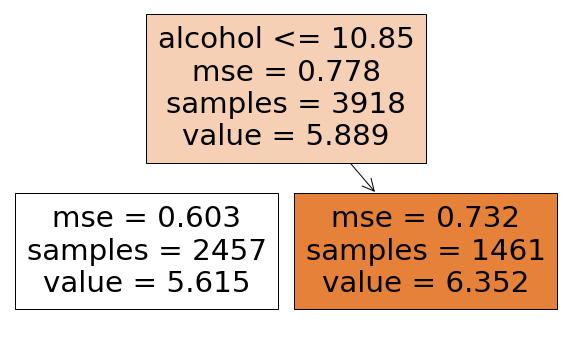

In [34]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [42]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4585,5.0,0.33,0.23,11.8,0.030,23.0,158.0,0.99322,3.41,0.64,11.8
4025,6.2,0.32,0.45,2.9,0.029,37.0,94.0,0.98998,3.25,0.60,12.4
3185,6.5,0.21,0.40,7.3,0.041,49.0,115.0,0.99268,3.21,0.43,11.0
3304,6.0,0.32,0.30,1.9,0.033,41.0,142.0,0.98912,3.29,0.42,12.8
506,7.3,0.51,0.26,3.3,0.090,7.0,135.0,0.99440,3.01,0.52,8.8


In [36]:
model.predict(X_train[:5].values).round(2)

array([6.35, 6.35, 6.35, 6.35, 5.61])

Some important questions for deep understanding:
 1. while training, why did the DecisionTree choose `alcohol` and $10.85$ ?

Imagine we chose `residual_sugar` and value 5

In [ ]:
group1 = X_train[X_train.residual_sugar <= 5].copy()
group2 = X_train[X_train.residual_sugar > 5].copy()

In [ ]:
group1.shape

In [ ]:
group2.shape

In [ ]:
group1_mean = y_train[group1.index].mean()

In [ ]:
group2_mean = y_train[group2.index].mean()

In [ ]:
group1_mean

In [ ]:
group2_mean

In [ ]:
mse = (
    ((y_train[group1.index] - group1_mean) ** 2).sum() +
    ((y_train[group2.index] - group2_mean) ** 2).sum()
) / X_train.shape[0]

In [ ]:
mse

Shitty improvement over baseline model, and much worse than alcohol 10.85, optimal feature-threshold pair

2. what is the meaning of `mse`: the mean squared error in the bucket: the one you would get if every wine in that bucket was given the mean of the bucket. This is, a baseline model in the bucket.
3. what is the meaning of `value`: the mean quality of wines in that bucket. The value that will be predicted for every new wine ending in that tree leaf

4. while testing (predicting a new instance), how does the tree operate? It goes through a unique path. When this path ends, the value in that leaf is the prediction

### Bigger tree (depth=3)

In [43]:
model = DecisionTreeRegressor(max_depth=3)

In [44]:
%%time
model.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 9.86 ms


DecisionTreeRegressor(max_depth=3)

In [45]:
# real values
y_train[:5]

4585    6
4025    6
3185    6
3304    7
506     5
Name: quality, dtype: int64

In [46]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([6.61, 6.61, 6.21, 6.61, 5.03])

Train error

In [47]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.5598058565365571

Test error

In [48]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.5831944046394488

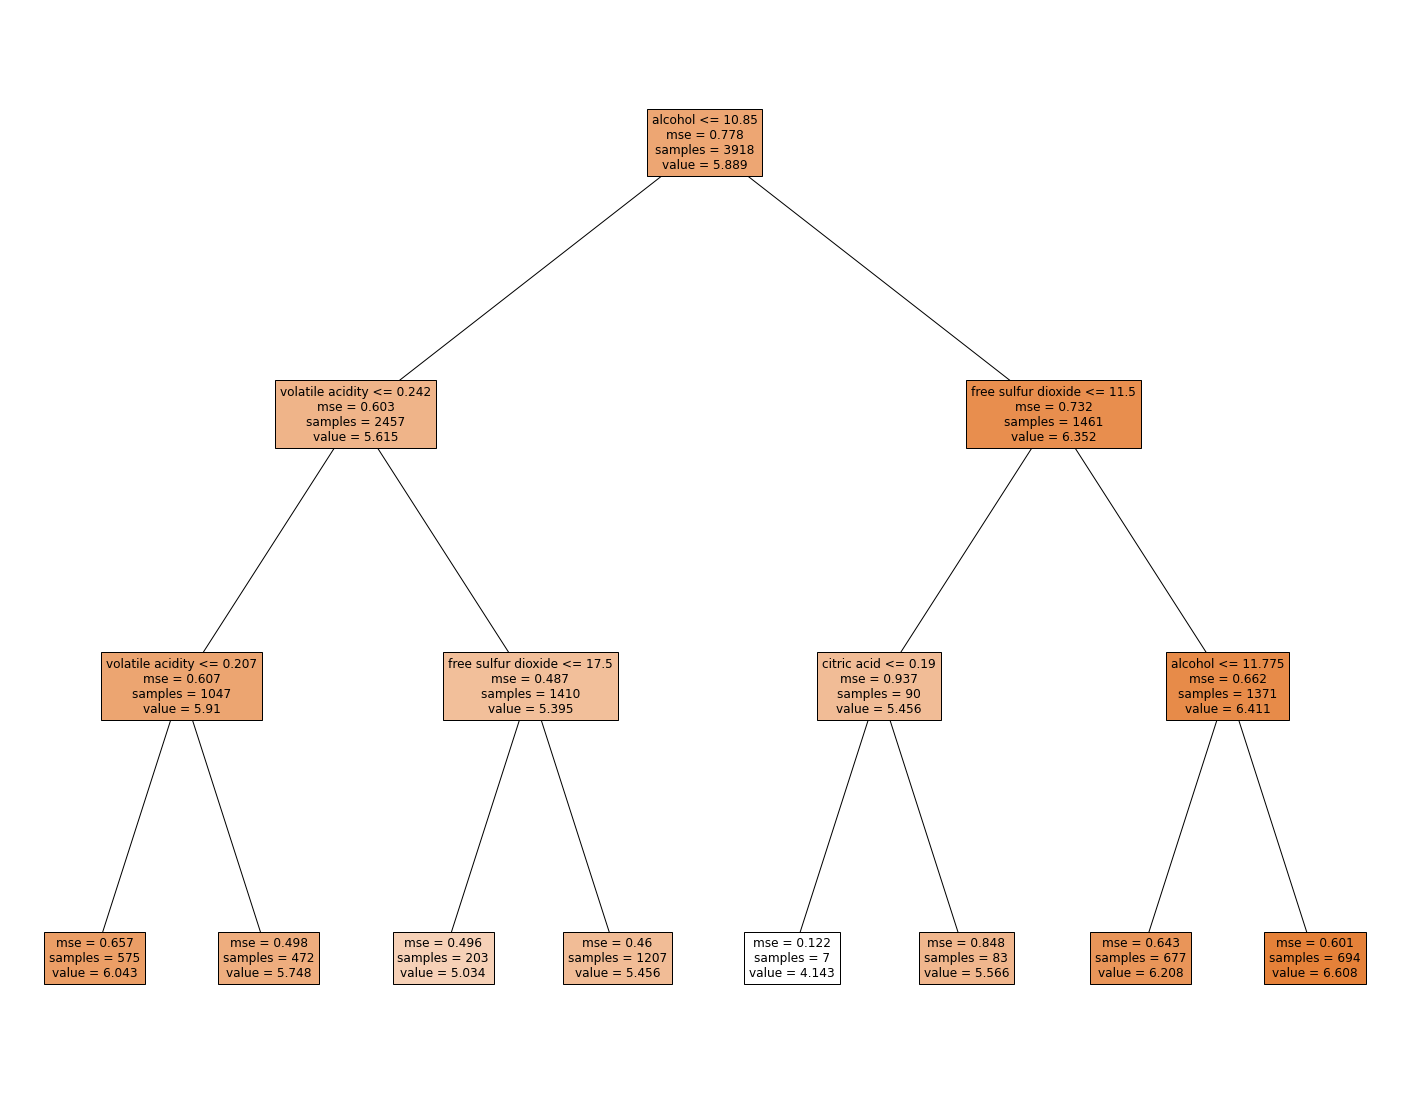

In [49]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Huge tree (depth=20)

In [51]:
model = DecisionTreeRegressor(max_depth=20)

In [52]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

Train error

In [53]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.005237513698750156

Test error

In [54]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.7143335027169082

**WHAT HAPPENED??**

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Overfitting

Lets see how training and test error changes with `max_depth`

In [55]:
results = []

for depth in range(1, 20):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [56]:
results_df = pd.DataFrame(results)

In [57]:
results_df

,depth,train_error,test_error
0,1,0.651140,0.685560
1,2,0.590774,0.615895
2,3,0.559806,0.583194
3,4,0.526841,0.552649
4,5,0.491170,0.550328
5,6,0.452954,0.554882
6,7,0.412669,0.554565
7,8,0.373612,0.578056
8,9,0.328613,0.585787
9,10,0.277888,0.580453


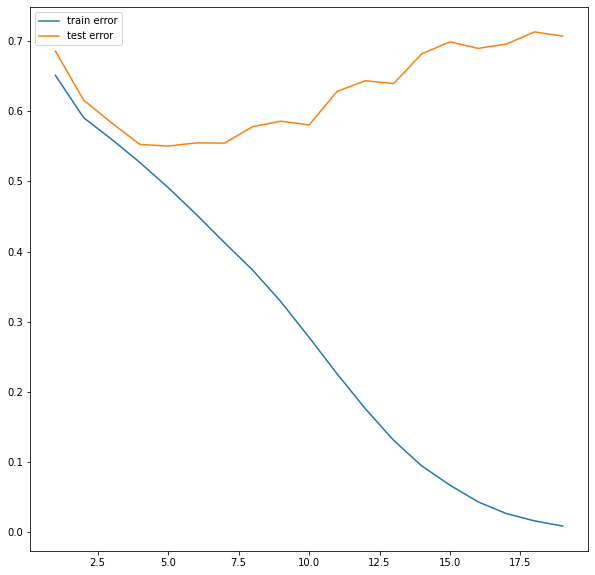

In [58]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

We can see how, when `max_depth` increases above ~6:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)

This is the famous overfitting! And this is why **test error** is the one you should look at!

### Other hyperparameters

As well as `max_depth`, there are other **hyperparameters** that let us build different trees' architectures of the family DecisionTreeRegressor:
 * `min_samples_split`: the minimum number of samples required to split an internal node  
 * `max_features`: the number of features to consider when looking for the best split  

In [ ]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=100, max_features=8)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

### Grid search

Lets find the **best** combination of hyperparameters, i.e. the ones yielding the least test error, among a prescribed grid of values for each hyperparameter

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100, 300, 1000],
        "max_features": [7, 11]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [63]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END max_depth=4, max_features=7, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=7, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=4, max_features=7, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=4, max_features=7, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=4, max_features=7, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=4, max_features=7, min_samples_split=50; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=7, min_samples_split=50; total time=   0.0s
[CV 3/5] END max_depth=4, max_features=7, min_samples_split=50; total time=   0.0s
[CV 4/5] END max_depth=4, max_features=7, min_samples_split=50; total time=   0.0s
[CV 5/5] END max_depth=4, max_features=7, min_samples_split=50; total time=   0.0s
[CV 1/5] END max_depth=4, max_features=7, min_samples_split=100; total time=   0.0s
[CV 2/5] END max_depth=4

[CV 3/5] END max_depth=6, max_features=7, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=6, max_features=7, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=6, max_features=7, min_samples_split=50; total time=   0.0s
[CV 2/5] END max_depth=6, max_features=7, min_samples_split=50; total time=   0.0s
[CV 3/5] END max_depth=6, max_features=7, min_samples_split=50; total time=   0.0s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=50; total time=   0.0s
[CV 5/5] END max_depth=6, max_features=7, min_samples_split=50; total time=   0.0s
[CV 1/5] END max_depth=6, max_features=7, min_samples_split=100; total time=   0.0s
[CV 2/5] END max_depth=6, max_features=7, min_samples_split=100; total time=   0.0s
[CV 3/5] END max_depth=6, max_features=7, min_samples_split=100; total time=   0.1s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=100; total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7], 'max_features': [7, 11],
                         'min_samples_split': [10, 50, 100, 300, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

Lets sort all trees by their performance:

In [64]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [67]:
grid_search_results.sort_values("mean_test_score", ascending=False).head()

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
21,6,7,50,-0.545392,-0.474660
26,6,11,50,-0.548699,-0.468542
36,7,11,50,-0.550164,-0.443504
23,6,7,300,-0.551019,-0.518055
27,6,11,100,-0.551549,-0.486081


We can access the best estimator of the grid search in this way

In [68]:
best_tree = gs.best_estimator_

In [69]:
best_tree

DecisionTreeRegressor(max_depth=6, max_features=7, min_samples_split=50)

In [70]:
mean_squared_error(best_tree.predict(X_test), y_test)

0.562691815854452

## Feature importance

How important were features for predicting `quality`? DecisionTreeRegressor has an attribute `feature_importances_`

In [74]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
sum(feature_imp)

1.0

<AxesSubplot:>

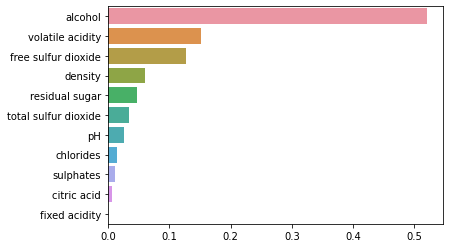

In [72]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

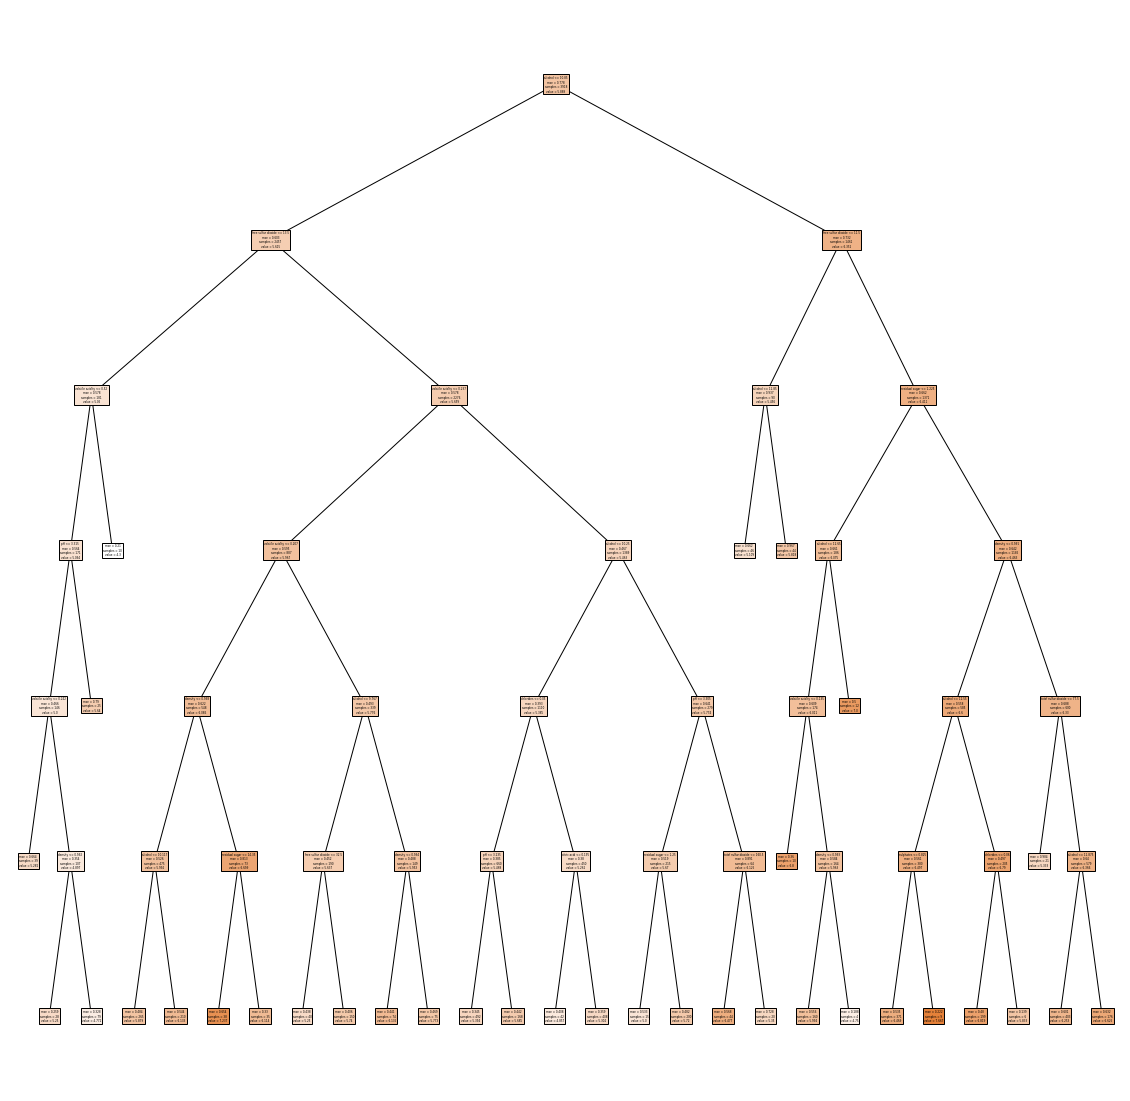

In [75]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=df.columns[:-1], filled=True);

Save in format `.svg` for non-pixeled image!!

In [ ]:
fig.savefig("decision_tree.svg", facecolor="white")

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`) and classification (`DecisionTreeClassifier`)
 * Their behavior is quite intuitive
 * Their behavior is interpretable and explainable

 * Decision trees overfit when `max_depth` becomes very big (obvious, individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error

 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms